# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## Carregando os dados

In [1]:
import pandas as pd

In [2]:
df_clientes = pd.read_csv("data/emp_automovel.csv")
df_clientes.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [20]:
import plotly.express as px

# Count occurrences of 0 and 1
counts = df_clientes['inadimplente'].value_counts()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Inadimplente': counts.index, 'Count': counts.values})
plot_data.replace({0:"Adimplência", 1: "Inadimplência"}, inplace=True)

fig = px.bar(plot_data, x='Inadimplente', y='Count', 
             color='Inadimplente',
             title='Comparação de contagem entre as classes',
             labels={'Inadimplente': 'Classes', 'Count': 'Número de ocorrências'})

fig.show()

## Separando os dados em Treino, Validação e Teste

![Separação de dados em treino, teste e validação](https://cdn3.gnarususercontent.com.br/3069-classificacao/Imagens/Aula1-img2.png)

In [16]:
x = df_clientes.drop(columns="inadimplente")
y = df_clientes["inadimplente"]

In [20]:
from sklearn.model_selection import train_test_split

SEED = 5

x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=SEED)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=SEED)

## Aplicar o modelo DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10, random_state=SEED)
decision_tree.fit(x_treino, y_treino)
print(f'Acurácia de treino: {decision_tree.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {decision_tree.score(x_val, y_val)}')

Acurácia de treino: 0.9206445993031359
Acurácia de validação: 0.905496036930581


### Matriz de Confusão

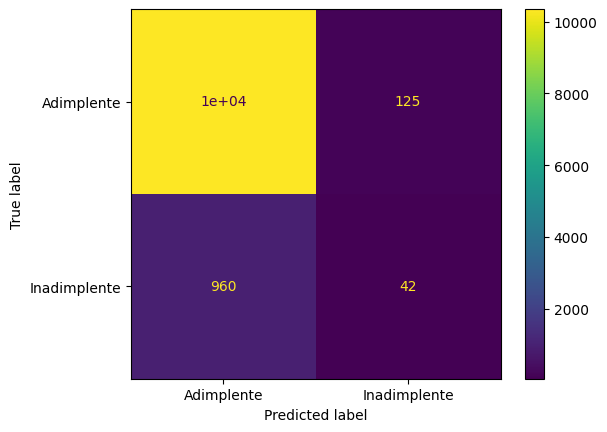

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predict = decision_tree.predict(x_val)

visualizacao = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val, y_predict), display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot()

## Modelo RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=10, random_state=SEED)
random_forest.fit(x_treino, y_treino)
print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {random_forest.score(x_val, y_val)}')

Acurácia de treino: 0.9153890824622531
Acurácia de validação: 0.9129866736347008


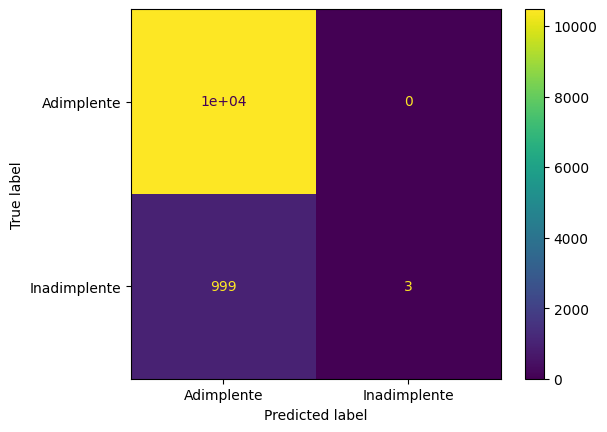

In [32]:
y_predict = random_forest.predict(x_val)

def confusion_matrix_visualization(confusion_matrix):
    visualizacao = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['Adimplente', 'Inadimplente'])
    visualizacao.plot()

confusion_matrix_visualization(confusion_matrix(y_val, y_predict))